[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a. Categorical: gender of a patient

b. Quantitative: age of a patient

c. Discrete: number of credits enrolled in this semester

d. Continuous: weight of a patient


**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

In [23]:
carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


Part a. Construct a histogram of CO2 emissions.

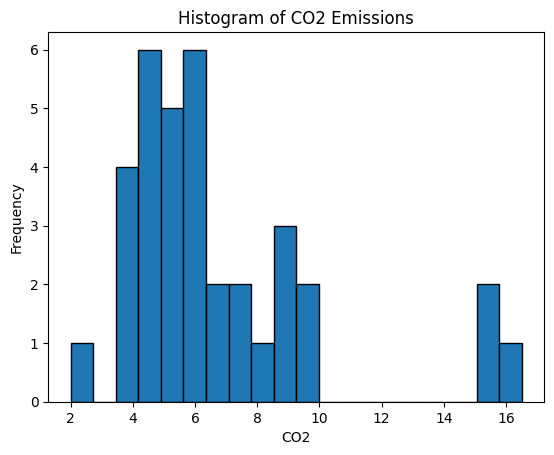

In [5]:
plt.hist(carbon_west['CO2'], bins=20, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [21]:
print(f"Mean: {carbon_west['CO2'].mean()}")
print(f"Median: {carbon_west['CO2'].median()}")
print(f"STD: {carbon_west['CO2'].std()}")

Mean: 6.717142857142858
Median: 5.9
STD: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [7]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [9]:
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


Part a. Find the mean and standard deviation for murders without D.C.

In [27]:
murders_wo_dc = murders[murders['state'] != 'DC']

In [30]:
print(f"Mean: {murders_wo_dc['murder'].mean()}")
print(f"Median: {murders_wo_dc['murder'].median()}")
print(f"STD: {murders_wo_dc['murder'].std()}")

Mean: 4.874
Median: 4.85
STD: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [29]:
murders_wo_dc.describe()

,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [32]:
print(f"Median: {murders['murder'].median()}")
murders.describe()

Median: 5.0


,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


The median moved 0.15 and the mean moved 0.379 (almost double), so the mean was more affected by the outlier.

The inter-quartile range remained near the same while the range changed quite a bit, since D.C. doubled the maximum, so the range was more affected by the outlier.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [33]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [34]:
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


In [43]:
x = houses['size']
y = houses['price']

Part a. Construct a scatterplot between square feet and price of a home.

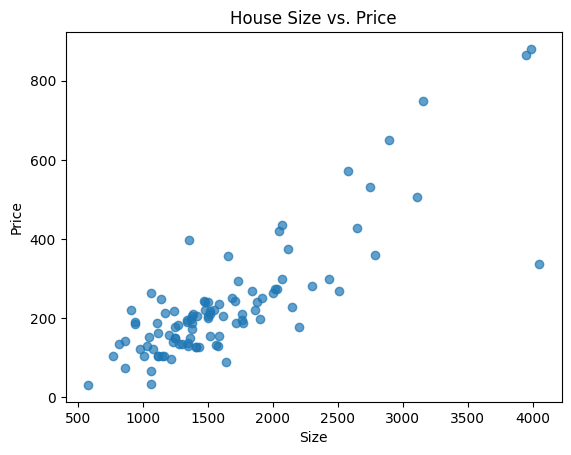

In [44]:
plt.scatter(x, y, alpha=0.7)
plt.title('House Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [45]:
print(f'Size-Price Correlation: {x.corr(y)}')

Size-Price Correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

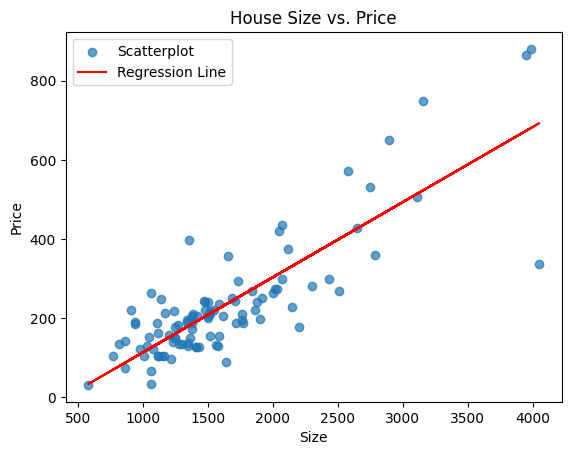

In [48]:
from sklearn.linear_model import LinearRegression

x = houses[['size']]

model = LinearRegression()
model.fit(x, y)

plt.scatter(x, y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('House Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

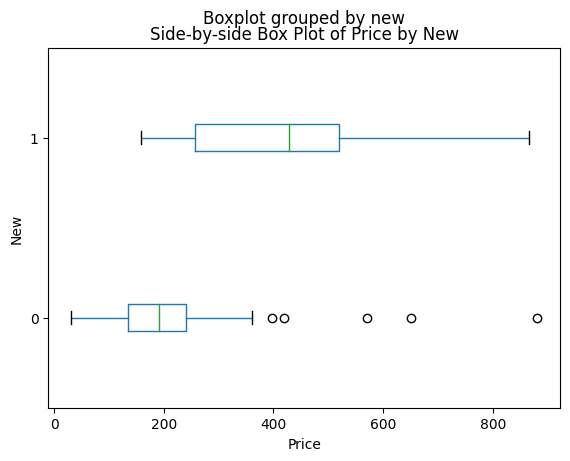

In [49]:
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-by-side Box Plot of Price by New')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

As size increases, price increases. This is evident since the regression line has a positive slope, the data points trend upward, and the factors are positively correlated.

If the house is new, it is likely more expensive. This is evident since the price distribution of new homes is shifted right compared to old homes. This is true for all of the five-number summary statistics, although an old home outlier price is larger than the max price for new homes.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [70]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')

In [71]:
happy.head()

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male


In [72]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135


In [73]:
pd.crosstab(happy['marital'], happy['happiness'], normalize='index')

happiness,1,2,3
marital,,,
1,0.433300,0.505517,0.061184
2,0.192872,0.591195,0.215933
3,0.185629,0.612275,0.202096
